In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import the Dataset
kidney_data = pd.read_csv("/Users/ikubannipaul/Documents/codes/data_science/ml/evaxion/python_analysis/kidney_disease.csv")
kidney_data.head(15)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


UNDERSTANDING THE DATASET & DATA CLEANING

In [4]:
print(f"the shape of the data is {kidney_data.shape}")

the shape of the data is (400, 26)


In [5]:
#the columns in the data
print(f" the variables are: {kidney_data.columns}")

 the variables are: Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [6]:
#get the information of the data
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
#convert pcv, wc & rc to numerical columns
kidney_data['pcv'] = pd.to_numeric(kidney_data['pcv'], errors='coerce')
kidney_data["wc"] = pd.to_numeric(kidney_data['wc'], errors='coerce')
kidney_data['rc'] = pd.to_numeric(kidney_data['rc'], errors='coerce')

In [8]:
cat_col = [col for col in kidney_data.columns if kidney_data[col].dtype == 'object']
num_col = [col for col in kidney_data.columns if kidney_data[col].dtype != 'object']

print(f"the categorical columns are: {cat_col}")
print(f"the numerical columns are: {num_col}")

the categorical columns are: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
the numerical columns are: ['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


In [9]:
#get the percentage of missing values
(kidney_data.isnull().sum()/len(kidney_data))*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.75
wc                26.50
rc                32.75
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

It is evident that the variable with the highest missing value has a percentage of 32.5% which is the red blood cell count. These variables will be filled with either their mode or mean- depending on the data type. MODE for object categorical, MEAN for integers

In [10]:
#create a dataframe for just the categorical columns
kidney_categorical = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
kidney_data[kidney_categorical].head()


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [11]:
#check the unique values in each columns
for i in kidney_data[kidney_categorical]:
  print(i + '    ',kidney_data[kidney_categorical][i].unique())

rbc     [nan 'normal' 'abnormal']
pc     ['normal' 'abnormal' nan]
pcc     ['notpresent' 'present' nan]
ba     ['notpresent' 'present' nan]
htn     ['yes' 'no' nan]
dm     ['yes' 'no' ' yes' '\tno' '\tyes' nan]
cad     ['no' 'yes' '\tno' nan]
appet     ['good' 'poor' nan]
pe     ['no' 'yes' nan]
ane     ['no' 'yes' nan]
classification     ['ckd' 'ckd\t' 'notckd']


In [12]:
#for variables with \ at the front, we will convert to make them uniform [dm, cad, classification]
kidney_data["dm"] = kidney_data["dm"].replace('\tno', 'no')
kidney_data["dm"] = kidney_data["dm"].replace('\tyes', 'yes')
kidney_data["dm"] = kidney_data["dm"].replace(' yes', 'yes')
kidney_data["cad"] = kidney_data["cad"].replace('\tno', 'no')
kidney_data["classification"] = kidney_data["classification"].replace('ckd\t', 'ckd')

In [13]:
#recheck the unique values in each columns
for i in kidney_data[kidney_categorical]:
  print(i + '    ',kidney_data[kidney_categorical][i].unique())

rbc     [nan 'normal' 'abnormal']
pc     ['normal' 'abnormal' nan]
pcc     ['notpresent' 'present' nan]
ba     ['notpresent' 'present' nan]
htn     ['yes' 'no' nan]
dm     ['yes' 'no' nan]
cad     ['no' 'yes' nan]
appet     ['good' 'poor' nan]
pe     ['no' 'yes' nan]
ane     ['no' 'yes' nan]
classification     ['ckd' 'notckd']


In [14]:
#fill the null values in the object categorical variables using the mode
cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for i in cols:
  kidney_data[i].fillna(kidney_data[kidney_categorical][i].mode()[0],inplace=True)

In [15]:
#get the null values in the object categorical variables
kidney_data[kidney_categorical].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [16]:
kidney_data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [17]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

SOLUTIONS FOR THE NUMERICAL COLUMNS

In [18]:
kidney_data[num_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [19]:
kidney_data[num_col].isnull().sum()

id        0
age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64

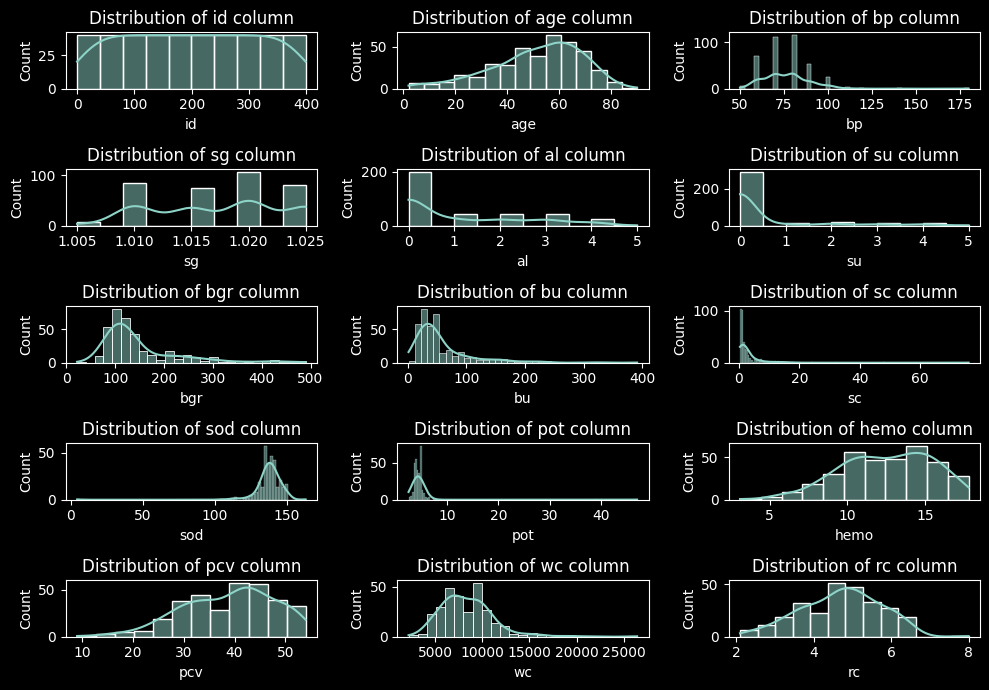

In [20]:
#plot the distribution plots for the integers to get information of their distributions
fig, axes = plt.subplots(5, 3, figsize=(10,7))
axes = axes.flatten()

for i, var in enumerate(num_col):
    sns.histplot(kidney_data[var], kde = True, ax=axes[i])
    axes[i].set_title(f"Distribution of {var} column")
plt.tight_layout()
plt.show();

Most of the numerical variables in the data seem not to be normally distributed, therefore, their medians will be used to avoid the influence of outliers, which could distort the mean- hereby the distribution of the variables remain same

In [21]:
#filling the missing observations
from sklearn.impute import SimpleImputer
skew_col = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc']
norm_col = ["rc"]

median_imputer = SimpleImputer(strategy="median")
kidney_data[skew_col] = median_imputer.fit_transform(kidney_data[skew_col])

mean_imputer = SimpleImputer(strategy="mean")
kidney_data[norm_col] = mean_imputer.fit_transform(kidney_data[norm_col])

kidney_data[num_col].isnull().sum()


id      0
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

In [22]:
#to recheck the whole data percentage of null values
(kidney_data.isnull().sum()/len(kidney_data))*100

id                0.0
age               0.0
bp                0.0
sg                0.0
al                0.0
su                0.0
rbc               0.0
pc                0.0
pcc               0.0
ba                0.0
bgr               0.0
bu                0.0
sc                0.0
sod               0.0
pot               0.0
hemo              0.0
pcv               0.0
wc                0.0
rc                0.0
htn               0.0
dm                0.0
cad               0.0
appet             0.0
pe                0.0
ane               0.0
classification    0.0
dtype: float64

Since the missing values have being solved, we can proceed to exploring the dataset

EXPLORATORY DATA ANALYSIS

In [23]:
#the target feature is classification which shows whether an individual has kidney disease or not
kidney_data["classification"].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

This shows that 250 has while 150 do not. We will let 1 represent ckd and 0 represents notckd during preprocessing/conversion

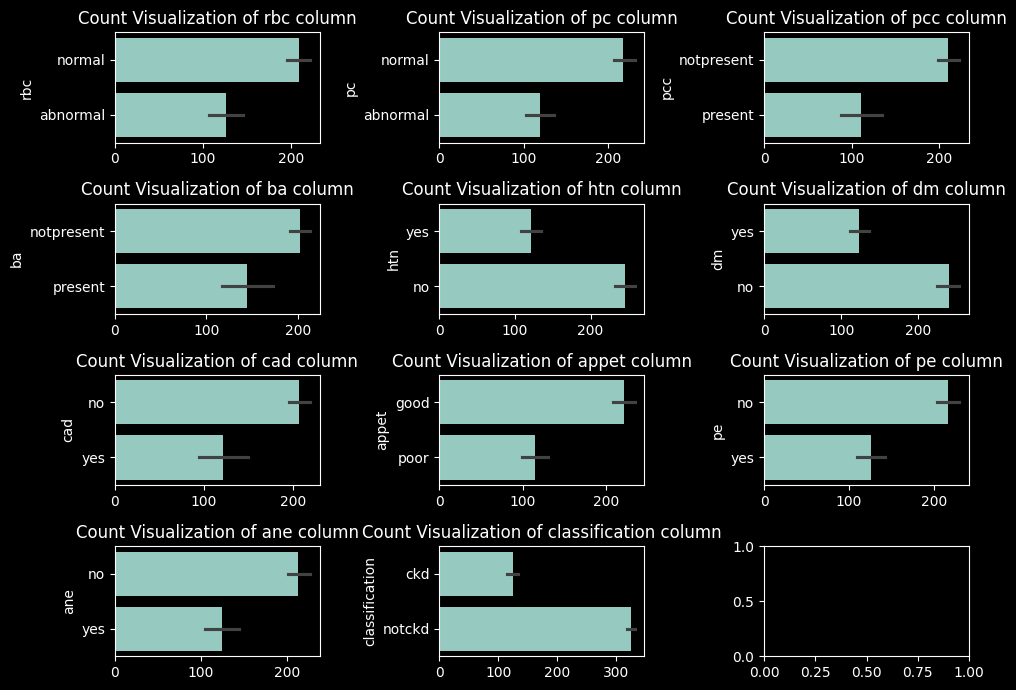

In [24]:
#bar plot 
#plot the distribution plots for the integers to get information of their distributions
fig, axes = plt.subplots(4, 3, figsize=(10,7))
axes = axes.flatten()

for i, var in enumerate(cat_col):
    sns.barplot(kidney_data[var], ax=axes[i])
    axes[i].set_title(f"Count Visualization of {var} column")
plt.tight_layout()
plt.show();

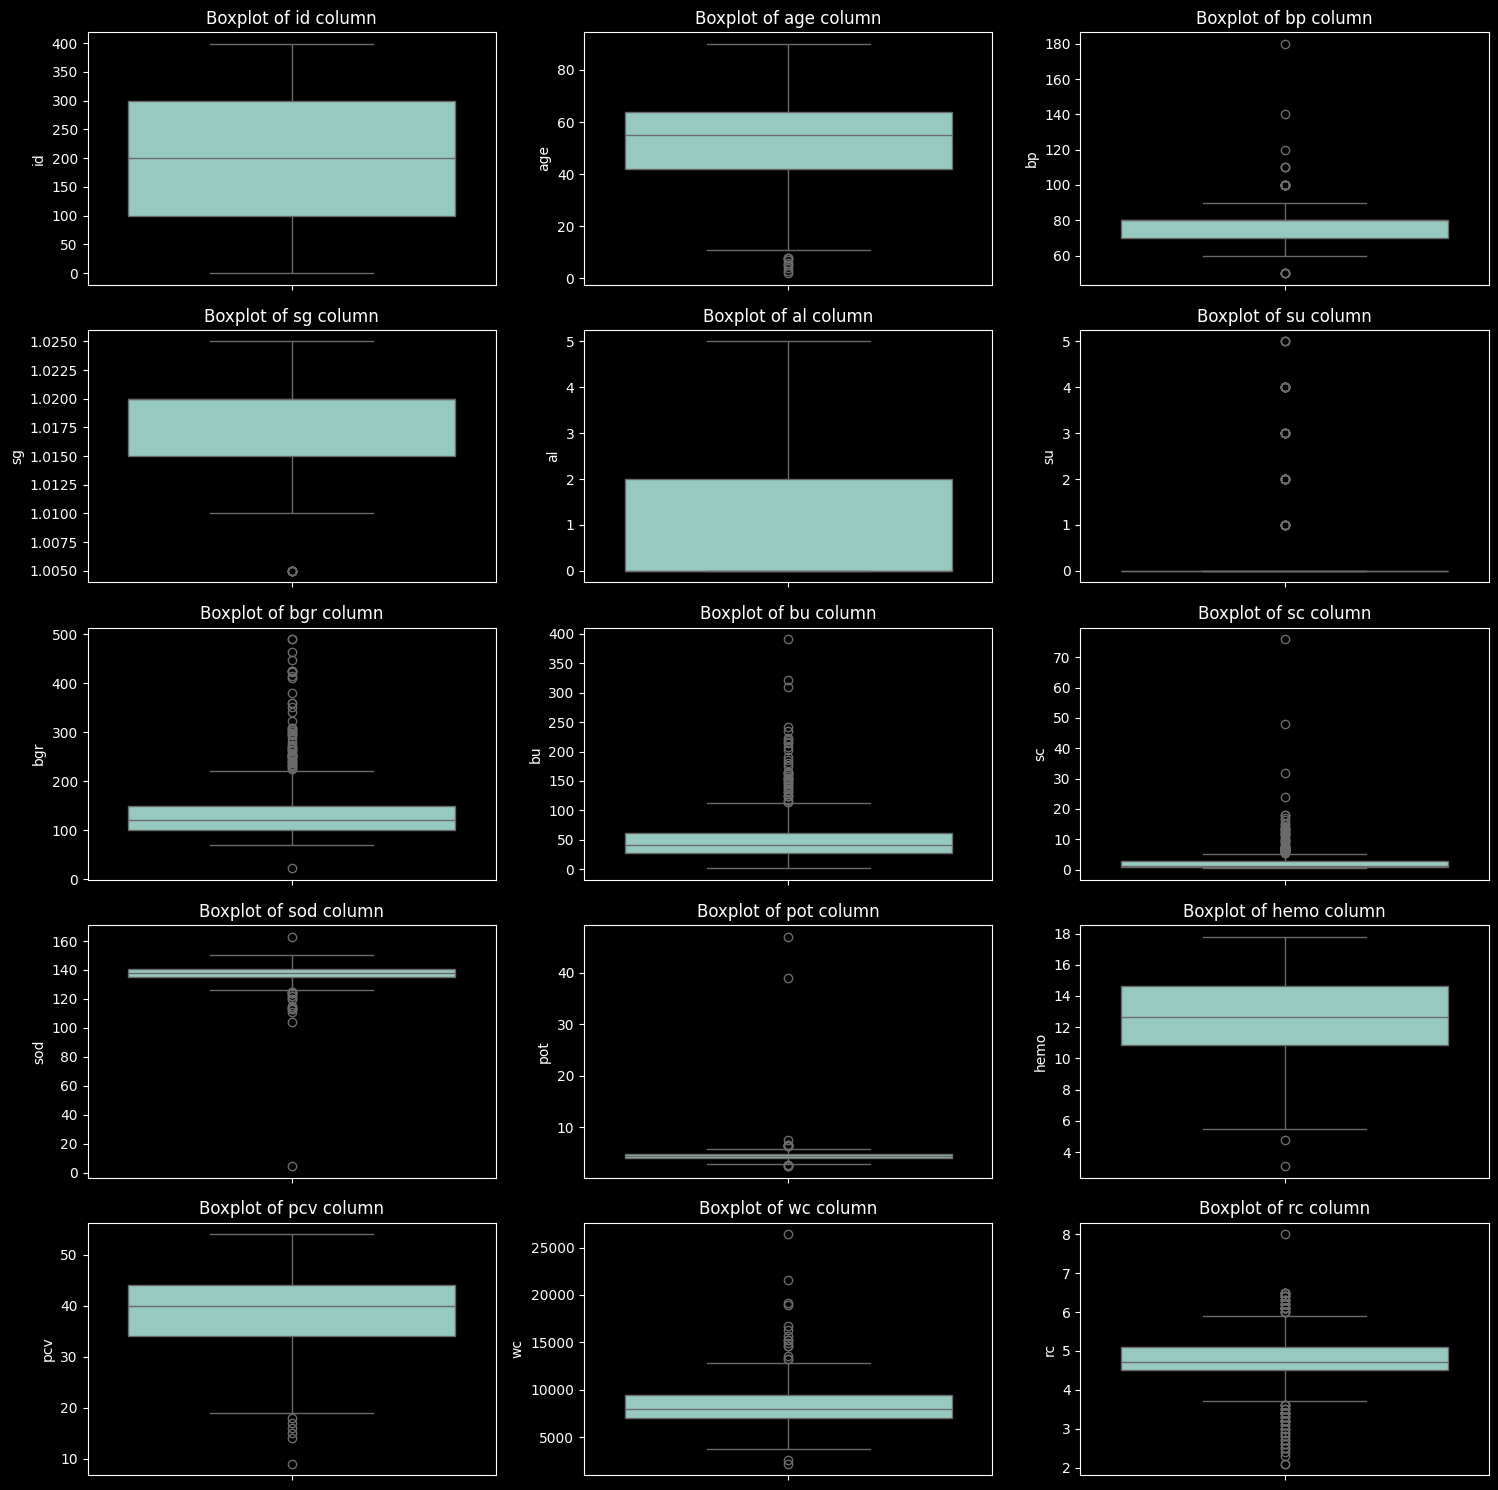

In [25]:
#plot the box plots of the numerical columns
fig, axes = plt.subplots(5, 3, figsize=(15,15))
axes = axes.flatten()

for i, var in enumerate(num_col):
    sns.boxplot(kidney_data[var], ax=axes[i])
    axes[i].set_title(f"Boxplot of {var} column")
plt.tight_layout()
plt.show();

PREPROCESSING

The categorical columns will be converted to nominal through mapping

In [26]:
map_rule1 = {'normal':1, 'abnormal':0}
map_rule2 = {'notpresent':0, 'present':1}
map_rule3 = {'yes':1, 'no':0}

kidney_data["rbc"] = kidney_data["rbc"].map(map_rule1)
kidney_data["pc"] = kidney_data["pc"].map(map_rule1)
kidney_data["pcc"] = kidney_data["pcc"].map(map_rule2)
kidney_data["ba"] = kidney_data["ba"].map(map_rule2)
kidney_data["htn"] = kidney_data["htn"].map(map_rule3)
kidney_data["dm"] = kidney_data["dm"].map(map_rule3)
kidney_data["cad"] = kidney_data["cad"].map(map_rule3)
kidney_data["appet"] = kidney_data["appet"].map({"good":1, "poor":0})
kidney_data["pe"] = kidney_data["pe"].map(map_rule3)
kidney_data["ane"] = kidney_data["ane"].map(map_rule3)
kidney_data["classification"] = kidney_data["classification"].map({"ckd":1, "notckd":0})

kidney_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [27]:
#check the data types of all columns
kidney_data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [28]:
#save the clean dataset
kidney_data.to_csv("New Kidney Data.csv")

ENHANCED ELITISM FOR STRATEGY GENERATION ALGORITHM

In [29]:
#Genetic Algorithm using DEAP library
#IMPORTING THE LIBRARY
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [30]:
#drop the id column
new = kidney_data.drop(columns=["id"])
new.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [31]:
#ENHANCED ELITISM FOR STRATEGY GENERATION ALGORITHM
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
X = new.iloc[:, :-1].values
y = new.iloc[:, -1].values

scaler = StandardScaler()
X = scaler.fit_transform(X)
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#define the indiviual & fitness functions
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness = creator.FitnessMax)

#Define ToolBox for genetic algorithm
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1) #attribute generator: Each gene is a binary 0 or 1 (select or don't select a feature)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X_train.shape[1]) #structure initializers: Individuals (a list of genes) & Population
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#define the fitness function
def evaluate(individual):
    #select feature according to the binary mask in "individual"
    mask = np.array(individual, dtype=bool)
    if np.sum(mask) == 0:
        return 0,
    X_selected = X_train[:, mask]
    classifier = SVC()
    fitness = cross_val_score(classifier, X_selected, y_train, cv=5).mean()
    return fitness,


#register the fitness function & operators
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb = 0.05)
toolbox.register("select", tools.selTournament, tournsize = 3)
toolbox.register("select_elitist", tools.selBest)

   
        
def enhanced_elitism(population, elite_size):
    elites = tools.selBest(population, elite_size)
    remaining = toolbox.select(population, len(population) - elite_size)
    next_gen = elites + remaining
    return next_gen

def main_with_elitism():
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    elite_size = 10

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    for gen in range(20):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.2)
        fits = map(toolbox.evaluate, offspring)

        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit

        pop = enhanced_elitism(offspring, elite_size)
        hof.update(pop)

        record = stats.compile(pop)
        print(f"Generation {gen}: {record}")

    best_individual = hof[0]
    selected_features = np.where(best_individual == 1)[0]
    print("BI:", best_individual)
    print("SF", selected_features)
    return best_individual, selected_features

if __name__ == "__main__":
    best_individual, selected_features = main_with_elitism()



Generation 0: {'avg': 0.9835625, 'std': 0.01210000645660985, 'min': 0.94375, 'max': 1.0}
Generation 1: {'avg': 0.99225, 'std': 0.006350442897940252, 'min': 0.978125, 'max': 1.0}
Generation 2: {'avg': 0.9969375, 'std': 0.0038268173787104004, 'min': 0.984375, 'max': 1.0}
Generation 3: {'avg': 0.9988125000000001, 'std': 0.0022439153838770347, 'min': 0.9875, 'max': 1.0}
Generation 4: {'avg': 1.0, 'std': 0.0, 'min': 1.0, 'max': 1.0}
Generation 5: {'avg': 1.0, 'std': 0.0, 'min': 1.0, 'max': 1.0}
Generation 6: {'avg': 0.9999375, 'std': 0.00043750000000000624, 'min': 0.996875, 'max': 1.0}
Generation 7: {'avg': 1.0, 'std': 0.0, 'min': 1.0, 'max': 1.0}
Generation 8: {'avg': 1.0, 'std': 0.0, 'min': 1.0, 'max': 1.0}
Generation 9: {'avg': 1.0, 'std': 0.0, 'min': 1.0, 'max': 1.0}
Generation 10: {'avg': 1.0, 'std': 0.0, 'min': 1.0, 'max': 1.0}
Generation 11: {'avg': 1.0, 'std': 0.0, 'min': 1.0, 'max': 1.0}
Generation 12: {'avg': 1.0, 'std': 0.0, 'min': 1.0, 'max': 1.0}
Generation 13: {'avg': 1.0, 'st

In [32]:
all_features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']
selection = [1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]

pd.DataFrame(all_features, selection)

,0
1,age
1,bp
1,sg
1,al
0,su
0,rbc
0,pc
1,pcc
0,ba
1,bgr


Selected Features To Be Usess for the SVM, KNN, RF algorithms are: age, bp, sg, al, pcc, bgr, sc, pcv,rc, htn,dm, cad, appet, pe. The 1 represents Selected & 0 represents not selected. 

In [33]:
kidney_data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [34]:
selected_features = kidney_data[['age', 'bp', 'sg', 'al', 'pcc', 'bgr','sc','pcv', 'rc', 'htn', 'dm', 'cad','appet', 'pe']]
selected_features.head()

,age,bp,sg,al,pcc,bgr,sc,pcv,rc,htn,dm,cad,appet,pe
0,48.0,80.0,1.020,1.0,0,121.0,1.2,44.0,5.200000,1,1,0,1,0
1,7.0,50.0,1.020,4.0,0,121.0,0.8,38.0,4.707435,0,0,0,1,0
2,62.0,80.0,1.010,2.0,0,423.0,1.8,31.0,4.707435,0,1,0,0,0
3,48.0,70.0,1.005,4.0,1,117.0,3.8,32.0,3.900000,1,0,0,0,1
4,51.0,80.0,1.010,2.0,0,106.0,1.4,35.0,4.600000,0,0,0,1,0


MACHINE LEARNING ALGORITHMS

In [35]:
#import the libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [36]:
#Data Splitting
X = selected_features
y = kidney_data["classification"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
#MODEL INITIALIZATION
svm_model = SVC(probability=True)
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()

#MODEL TRAINING
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

#PREDICTIONS
predicted_svm = svm_model.predict(X_test)
predicted_knn = knn_model.predict(X_test)
predicted_rf = rf_model.predict(X_test)

In [38]:
X_test


,age,bp,sg,al,pcc,bgr,sc,pcv,rc,htn,dm,cad,appet,pe
209,19.0,70.0,1.020,0.0,0,121.0,1.3,40.0,4.707435,0,0,0,1,0
280,47.0,80.0,1.020,0.0,0,93.0,0.9,52.0,5.200000,0,0,0,1,0
33,60.0,100.0,1.020,2.0,0,140.0,2.5,29.0,4.707435,1,0,0,0,0
210,59.0,100.0,1.015,4.0,0,255.0,12.8,20.0,3.900000,1,1,1,1,0
93,73.0,100.0,1.010,3.0,1,295.0,5.6,30.0,3.200000,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,48.0,110.0,1.015,3.0,1,106.0,15.2,26.0,2.500000,1,0,1,1,0
227,57.0,80.0,1.015,0.0,0,120.0,1.6,36.0,3.800000,1,1,0,1,0
369,75.0,70.0,1.020,0.0,0,107.0,0.8,46.0,4.800000,0,0,0,1,0
176,21.0,90.0,1.010,4.0,1,107.0,1.7,23.0,3.900000,0,0,0,1,0


In [39]:
rf_model.predict(X_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [40]:
X_test

,age,bp,sg,al,pcc,bgr,sc,pcv,rc,htn,dm,cad,appet,pe
209,19.0,70.0,1.020,0.0,0,121.0,1.3,40.0,4.707435,0,0,0,1,0
280,47.0,80.0,1.020,0.0,0,93.0,0.9,52.0,5.200000,0,0,0,1,0
33,60.0,100.0,1.020,2.0,0,140.0,2.5,29.0,4.707435,1,0,0,0,0
210,59.0,100.0,1.015,4.0,0,255.0,12.8,20.0,3.900000,1,1,1,1,0
93,73.0,100.0,1.010,3.0,1,295.0,5.6,30.0,3.200000,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,48.0,110.0,1.015,3.0,1,106.0,15.2,26.0,2.500000,1,0,1,1,0
227,57.0,80.0,1.015,0.0,0,120.0,1.6,36.0,3.800000,1,1,0,1,0
369,75.0,70.0,1.020,0.0,0,107.0,0.8,46.0,4.800000,0,0,0,1,0
176,21.0,90.0,1.010,4.0,1,107.0,1.7,23.0,3.900000,0,0,0,1,0


In [41]:
#ACCURACY SCORES
svm_score = accuracy_score(y_test, predicted_svm)
knn_score = accuracy_score(y_test, predicted_knn)
rf_score = accuracy_score(y_test, predicted_rf)
print(f"The accuracy score of the model while using Support Vector Classifier is {svm_score}")
print(f"The accuracy score of the model while using KNN Classifier is {knn_score}")
print(f"The accuracy score of the model while using Random Forest Classifier is {rf_score}")

The accuracy score of the model while using Support Vector Classifier is 0.825
The accuracy score of the model while using KNN Classifier is 0.9125
The accuracy score of the model while using Random Forest Classifier is 1.0


In [42]:
#Specificity, Sensitivity & AUC
#get probabilities for AUC
y_prob_svm = svm_model.predict_proba(X_test)[:,1]
y_prob_knn = knn_model.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

#function to calcu;ate sensitivity & specificity
def calc_spec_sens(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp/(tp + fn) 
    specificity = tn/(tn + fp)
    return sensitivity, specificity

#Evaluate SVM Model
sens_svm , spec_svm = calc_spec_sens(y_test, predicted_svm)
svm_auc = roc_auc_score(y_test, y_prob_svm)

#Evaluate KNN Model
sens_knn, spec_knn = calc_spec_sens(y_test, predicted_knn)
knn_auc = roc_auc_score(y_test, y_prob_knn)

#Evaluate RF Model 
sens_rf, spec_rf = calc_spec_sens(y_test, predicted_rf)
rf_auc = roc_auc_score(y_test, y_prob_rf)

#Print Evaluation Metrics
print(f"SVM: Sensitivity = {sens_svm}, Specificity = {spec_svm}, AUC = {svm_auc}")
print(f"KNN: Sensitivity = {sens_knn}, Specificity = {spec_knn}, AUC = {knn_auc}")
print(f"RF: Sensitivity = {sens_rf}, Specificity = {spec_rf}, AUC = {rf_auc}")

SVM: Sensitivity = 0.8461538461538461, Specificity = 0.7857142857142857, AUC = 0.9244505494505495
KNN: Sensitivity = 0.9230769230769231, Specificity = 0.8928571428571429, AUC = 0.9646291208791209
RF: Sensitivity = 1.0, Specificity = 1.0, AUC = 1.0


In [43]:
import pickle

In [44]:
pickle.dump(rf_model, open('kidney_model.pkl', 'wb'))

From the accuracy score, it is evident that the Random Forest predics kidney disease better compared to the other two models. The Sensitivity (Recall Score), Specificity and AUC provides more explanation when used to evaluate the models' performances